In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians
import os

In [2]:
def plot_TMA():
    
    TMA_lon=[9.59556, 11.7944, 11.8494, 12.0989, 12.3611, 12.3394, 12.3417, 12.2917, 11.8292, 11.6958, 11.0722, 10.95, 10.5583, 10.1, 9.59556];

    TMA_lat=[59.7097, 59.3667, 59.8333, 59.8906, 60.2236, 60.4039, 60.5, 60.7125, 60.875, 60.7972, 60.8778, 60.9389, 60.925, 60.7292, 59.7097];

    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
    central_longitude = min(TMA_lon) + (max(TMA_lon)-min(TMA_lon))/2
    print(central_latitude, central_longitude)
    #print(central_latitude)
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    #ax.set_aspect(mercator_aspect_ratio)

    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plt.plot(TMA_lon, TMA_lat, color="blue")

60.1528 10.97833


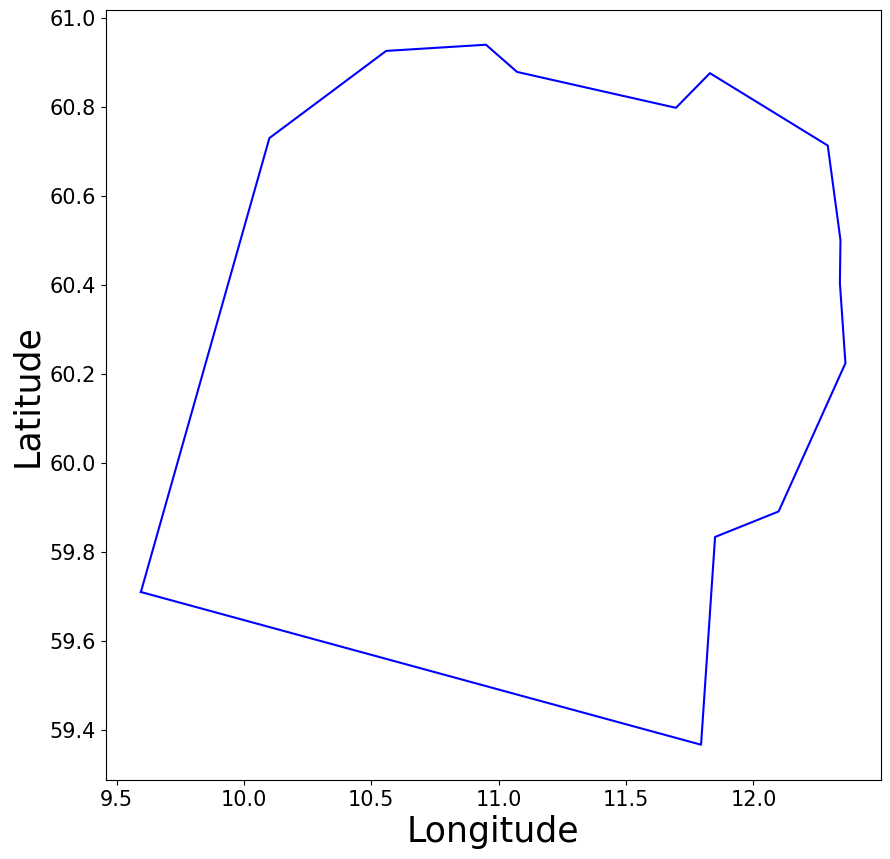

In [3]:
plot_TMA()

In [4]:
 def plot_horizontal_profile(df, title):
    linewidth=1
    plot_TMA()
    
    if df.empty:
        return
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        #print(flight_id)
        
        lons = flight_df["lon"]
        lats = flight_df["lat"]
        
        plt.plot(lons, lats, color='k', linewidth=linewidth)
        
    plt.title(title)

In [5]:
def plot_vertical_profile(df, linewidth=1):
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['altitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
            
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

In [6]:
def plot_raw_vertical_profile(df, linewidth=1):
           
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['rawAltitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [47]:
filename = "../Data/ENGM/2019/osn_ENGM_tracks_2019/osn_arrival_ENGM_tracks_2019_10_week5.csv"
tracks_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'origin', 'endDate', 'callsign', 'icao24', 'timestamp', 'lat', 'lon', 'baroAltitude'])
tracks_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(tracks_df.groupby(level='flightId')))

841


In [48]:
filename = "../Data/ENGM/2019/osn_ENGM_tracks_around250NM_2019/osn_arrival_ENGM_tracks_around250NM_2019_10_week5.csv"
tracks_around250_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'origin', 'endDate', 'callsign', 'icao24', 'timestamp', 'lat', 'lon', 'baroAltitude'])
tracks_around250_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(tracks_around250_df.groupby(level='flightId')))
filename = "../Data/ENGM/2019/osn_ENGM_tracks_around50NM_2019/osn_arrival_ENGM_tracks_around50NM_2019_10_week5.csv"
tracks_around50_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'origin', 'endDate', 'callsign', 'icao24', 'timestamp', 'lat', 'lon', 'baroAltitude'])
tracks_around50_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(tracks_around50_df.groupby(level='flightId')))

839
839


In [49]:
filename = "../Data/ENGM/2019/osn_ENGM_states_around250NM_2019_downloaded/osn_arrival_ENGM_states_around250NM_2019_10_week5.csv"
states_extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_extracted_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_extracted_df.groupby(level='flightId')))
filename = "../Data/ENGM/2019/osn_ENGM_states_around50NM_2019_downloaded/osn_arrival_ENGM_states_around50NM_2019_10_week5.csv"
states_extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_extracted_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_extracted_df.groupby(level='flightId')))

839
839


In [51]:
filename = "../Data/ENGM/2019/osn_ENGM_states_250NM_2019_extracted/osn_arrival_ENGM_states_250NM_extracted_2019_10_week5.csv"
states_extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_extracted_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_extracted_df.groupby(level='flightId')))
filename = "../Data/ENGM/2019/osn_ENGM_states_50NM_2019_extracted/osn_arrival_ENGM_states_50NM_extracted_2019_10_week5.csv"
states_extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_extracted_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_extracted_df.groupby(level='flightId')))

839
839


In [52]:
filename = "../Data/ENGM/2019/osn_ENGM_states_250NM_2019_filtered_by_callsign/osn_arrival_ENGM_states_250NM_filtered_2019_10_week5.csv"
states_filtered_by_callsign_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_callsign_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_callsign_df.groupby(level='flightId')))
filename = "../Data/ENGM/2019/osn_ENGM_states_50NM_2019_filtered_by_callsign/osn_arrival_ENGM_states_50NM_filtered_2019_10_week5.csv"
states_filtered_by_callsign_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_callsign_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_callsign_df.groupby(level='flightId')))

831
831


In [53]:
filename = "../Data/ENGM/2019/osn_ENGM_states_250NM_2019_smoothed/osn_arrival_ENGM_states_250NM_smoothed_2019_10_week5.csv"
states_smoothed_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_smoothed_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_smoothed_df.groupby(level='flightId')))
filename = "../Data/ENGM/2019/osn_ENGM_states_50NM_2019_smoothed/osn_arrival_ENGM_states_50NM_smoothed_2019_10_week5.csv"
states_smoothed_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_smoothed_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_smoothed_df.groupby(level='flightId')))

831
827


In [55]:
filename = "../Data/ENGM/2019/osn_ENGM_states_250NM_2019_filtered_by_altitude/osn_arrival_ENGM_states_250NM_2019_10_week5.csv"
states_filtered_by_altitude_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_altitude_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_altitude_df.groupby(level='flightId')))
filename = "../Data/ENGM/2019/osn_ENGM_states_50NM_2019_filtered_by_altitude/osn_arrival_ENGM_states_50NM_2019_10_week5.csv"
states_filtered_by_altitude_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_filtered_by_altitude_df.set_index(['flightId', 'sequence'], inplace = True)
print(len(states_filtered_by_altitude_df.groupby(level='flightId')))

529
755


60.1528 10.97833


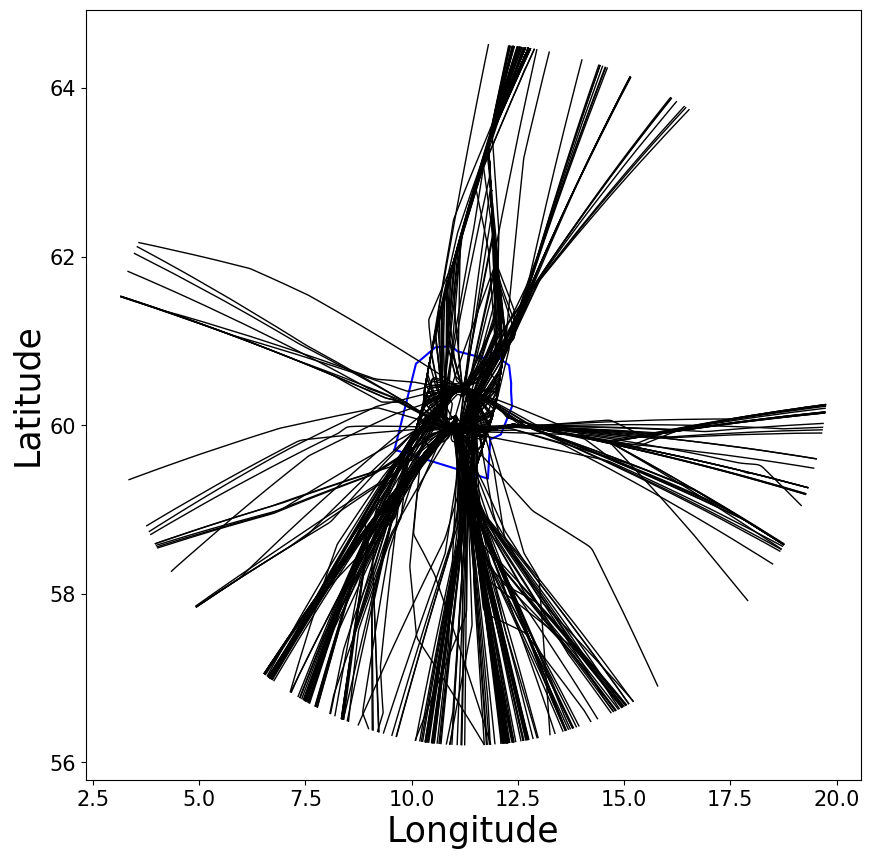

In [19]:
plot_horizontal_profile(states_extracted_df, "")

60.1528 10.97833


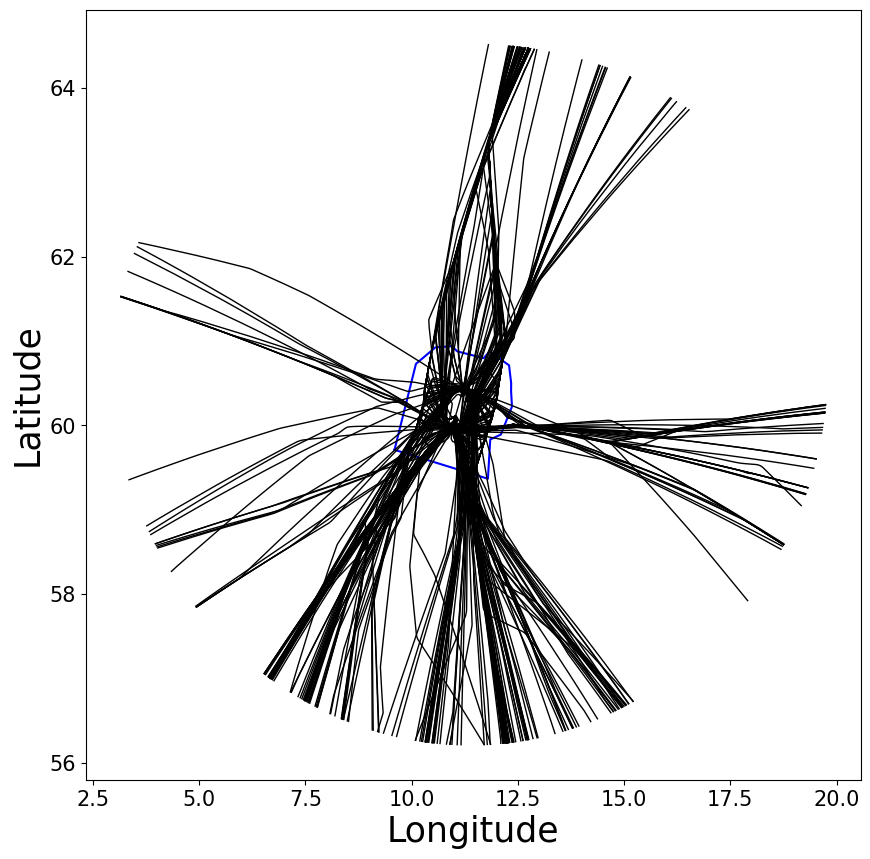

In [38]:
plot_horizontal_profile(states_filtered_by_altitude_df, "")